# Import

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns



# Data Export

In [9]:
df = pd.read_excel('/Users/margotiamanova/Desktop/DI-FinalProject/results/Yad2_Real_Estate_Listings.xlsx')

In [10]:
df.head() ## Displays the first 5 rows by default
df.info() ## Displays the data types of each column and the number of non-null values
df.describe() ## Displays the summary statistics of the numerical columns
df.columns ## Displays the names of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_numeric                                 2387 non-null   int64  
 1   Address                                    2387 non-null   object 
 2   Price                                      2370 non-null   float64
 3   Currency                                   2387 non-null   object 
 4   Link                                       2387 non-null   object 
 5   Property Type                              2387 non-null   object 
 6   Rooms_count                                2387 non-null   int64  
 7   Floor                                      2387 non-null   int64  
 8   Area                                       2387 non-null   int64  
 9   City                                       2387 non-null   object 
 10  Neighborhood            

Index(['ID_numeric', 'Address', 'Price', 'Currency', 'Link', 'Property Type',
       'Rooms_count', 'Floor', 'Area', 'City', 'Neighborhood', 'Tags1',
       'Tags2', 'Tags3', '3 bathrooms', 'Security room', '2 balconies',
       'Unique', 'After urban renewal', 'Renovated building', '3 balconies',
       'Large kitchen', 'Parking', '3 air directions', '4 bathrooms',
       'Close to park', 'Close to the sea', 'Open city view',
       '4 air directions', 'Open sea view', '4 balconies', 'Flexible price',
       'New property', 'Master suite', 'First line to the sea',
       'Open park view', 'Received urban renewal permit',
       'Worth seeing / Don’t miss out', 'Rear-facing property',
       'New from the contractor', 'Architecturally renovated',
       'Bargain opportunity / Special opportunity', 'recommended'],
      dtype='object')

# Data Cleaning


    Removing Duplicates
    Removing Irrelevant Data
    Fixing Structural Errors
    Identifying Missing Values
    Handling Missing Values
    Handling Outliers




## Removing Duplicates

In [11]:
duplicate_count = df.duplicated().sum() # Count the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


## Removing Irrelevant Data

In [12]:
df = df.drop(['Link','Tags1','Tags2','Tags3','ID_numeric','Currency','Neighborhood'], axis=1)

#Link - URL of the listing is not needed for analysis
#Tags1, Tags2, Tags3 - These columns contain tags that are not relevant for analysis (not needed for the analysis)


In [13]:
df.head()

,Address,Price,Property Type,Rooms_count,Floor,Area,City,3 bathrooms,Security room,2 balconies,...,Master suite,First line to the sea,Open park view,Received urban renewal permit,Worth seeing / Don’t miss out,Rear-facing property,New from the contractor,Architecturally renovated,Bargain opportunity / Special opportunity,recommended
0,Judges 21,5220000.0,Duplex house,6,0,345,Pardes Hanna Karkur,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Matalon 78,3150000.0,Apartment,2,2,50,Tel Aviv-Yafo,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Verdit 15,4300000.0,Private house / Cottage',6,0,270,Tzur Hadassah,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Klil Horesh 21,1770000.0,Apartment,3,0,124,Upper Nazareth / Galilee View,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,Yarmouk 4,1650000.0,Garden apartment,3,0,114,Lod,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Handling Missing Values

In [14]:
# Check for missing values in a DataFrame
missing_data = df.isnull()
print(missing_data.head())

   Address  Price  Property Type  Rooms_count  Floor   Area   City  \
0    False  False          False        False  False  False  False   
1    False  False          False        False  False  False  False   
2    False  False          False        False  False  False  False   
3    False  False          False        False  False  False  False   
4    False  False          False        False  False  False  False   

   3 bathrooms  Security room  2 balconies  ...  Master suite  \
0        False          False        False  ...         False   
1        False          False        False  ...         False   
2        False          False        False  ...         False   
3        False          False        False  ...         False   
4        False          False        False  ...         False   

   First line to the sea  Open park view  Received urban renewal permit  \
0                  False           False                          False   
1                  False           Fal

In [15]:
# Count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

Address                                       0
Price                                        17
Property Type                                 0
Rooms_count                                   0
Floor                                         0
Area                                          0
City                                          0
3 bathrooms                                   0
Security room                                 0
2 balconies                                   0
Unique                                        0
After urban renewal                           0
Renovated building                            0
3 balconies                                   0
Large kitchen                                 0
Parking                                       0
3 air directions                              0
4 bathrooms                                   0
Close to park                                 0
Close to the sea                              0
Open city view                          

Handling Missing Values

Missing values need to be addressed. Depending on your problem, there is multiple solutions to handle them :

    Removing Missing Data : we use this approach when the missing values are relatively few, randomly distributed, and removing them does not significantly reduce the size of the dataset.
    Imputation : we perform imputation when you want to retain as much data as possible, especially if the missing values contain valuable information.
    Advanced Imputation Techniques : it can be used when simple imputation methods like mean, median, or mode imputation are not suitable. In this case we use regression imputation, k-nearest neighbors imputation, or machine learning-based imputation (we will dive in this methods in a few weeks).


I will use Imputation involves filling in missing values with estimated or calculated values using fillnafunction.

In [16]:
# Fill missing values with a specific value (e.g., 0)
df['City'] = df['City'].fillna('NULL') 
df['Price'] = df['Price'].fillna('NULL') 
df['Area'] = df['Area'].fillna('NULL') 


In [17]:
# Remove rows where City is 'NULL'
# df = df[df['City'] != 'NULL']
# Remove rows where Price is 'NULL'
df = df[df['Price'] != 'NULL']
# Remove rows where Area is 'NULL'
df = df[df['Area'] != 'NULL']


In [18]:
# check data types of each column
print(df.dtypes)


Address                                      object
Price                                        object
Property Type                                object
Rooms_count                                   int64
Floor                                         int64
Area                                          int64
City                                         object
3 bathrooms                                   int64
Security room                                 int64
2 balconies                                   int64
Unique                                        int64
After urban renewal                           int64
Renovated building                            int64
3 balconies                                   int64
Large kitchen                                 int64
Parking                                       int64
3 air directions                              int64
4 bathrooms                                   int64
Close to park                                 int64
Close to the

In [19]:
# Convert columns to numeric, forcing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# Проверка типа данных после преобразования
print(df.dtypes)


Address                                       object
Price                                        float64
Property Type                                 object
Rooms_count                                    int64
Floor                                          int64
Area                                           int64
City                                          object
3 bathrooms                                    int64
Security room                                  int64
2 balconies                                    int64
Unique                                         int64
After urban renewal                            int64
Renovated building                             int64
3 balconies                                    int64
Large kitchen                                  int64
Parking                                        int64
3 air directions                               int64
4 bathrooms                                    int64
Close to park                                 

## Handling Outliers

In [20]:
import pandas as pd

# Example: assuming df is your DataFrame
# Ensure the 'Area' and 'Price' columns exist and have valid numeric values

# Calculate IQR for 'Area' and 'Price'
Q1_area = df['Area'].quantile(0.25)
Q3_area = df['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Calculate the mean of 'Area' and 'Price'
mean_area = df['Area'].mean()
mean_price = df['Price'].mean()

# Replace outliers with the mean for 'Area' and 'Price'
df['Area'] = df['Area'].apply(lambda x: mean_area if x < lower_bound_area or x > upper_bound_area else x)
df['Price'] = df['Price'].apply(lambda x: mean_price if x < lower_bound_price or x > upper_bound_price else x)

# Verify the changes
print("Updated DataFrame (showing first 5 rows):")
print(df[['Area', 'Price']].head())


Updated DataFrame (showing first 5 rows):
    Area      Price
0  345.0  5220000.0
1   50.0  3150000.0
2  270.0  4300000.0
3  124.0  1770000.0
4  114.0  1650000.0


In [21]:
# Save the updated DataFrame to an Excel file
df.to_excel('updated_real_estate_data.xlsx', index=False)

print("Data saved successfully!")


Data saved successfully!


City correlation with Price:
City_Tel Aviv-Yafo     0.154685
City_Herzliya          0.115120
City_Dania             0.076452
City_Raanana           0.073211
City_Ramat Hasharon    0.061836
                         ...   
City_Kiryat Gat       -0.083204
City_Yeruham          -0.087888
City_Boulevard        -0.103462
City_Dimona           -0.107068
City_Beer Sheva       -0.146371
Name: Price, Length: 234, dtype: float64


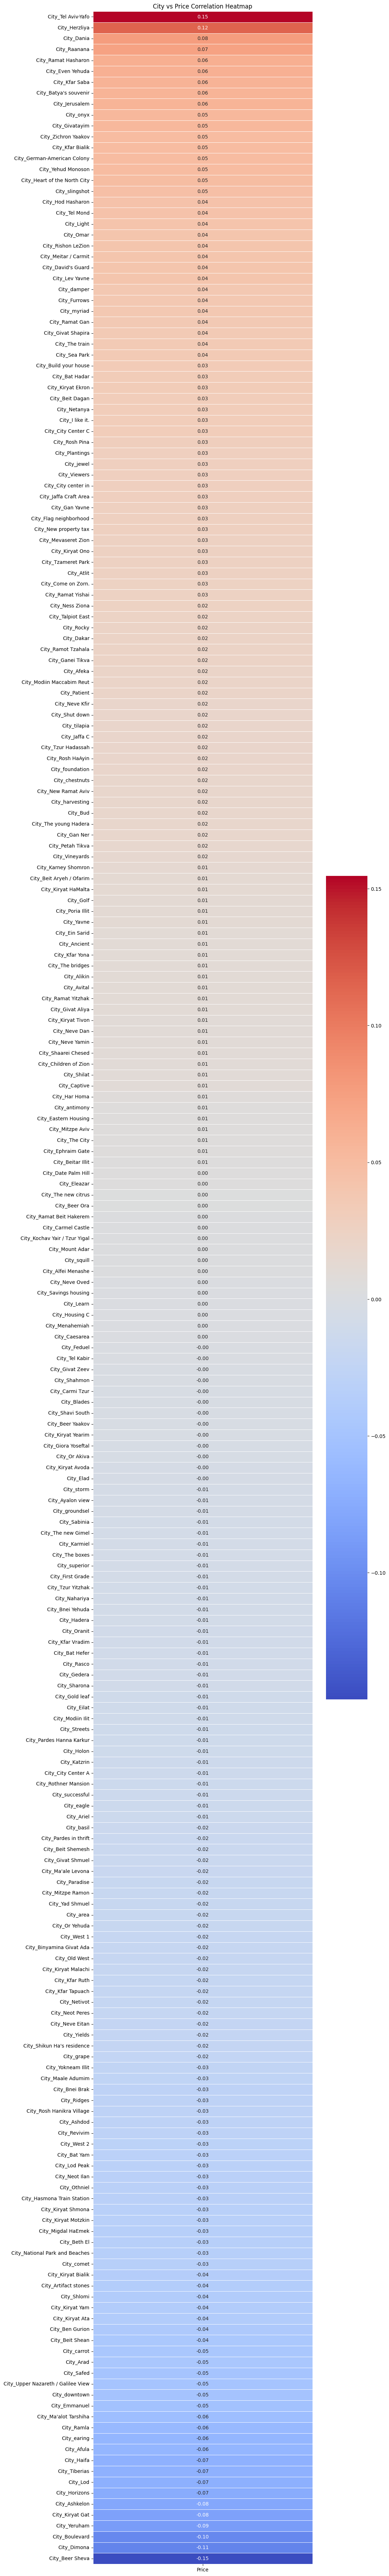

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# One-hot encode the 'City' column
df_encoded = pd.get_dummies(df, columns=['City'], prefix='City', drop_first=True)

# Find the city columns
city_cols = [col for col in df_encoded.columns if col.startswith('City_')]

# Create a smaller DataFrame with city dummies and Price
city_corr_df = df_encoded[city_cols + ['Price']]

# Compute correlation matrix
city_corr_matrix = city_corr_df.corr()

# Display only correlation of each city with Price
correlation_with_price = city_corr_matrix['Price'].drop('Price').sort_values(ascending=False)
print("City correlation with Price:")
print(correlation_with_price)

# Plot heatmap
plt.figure(figsize=(10, len(city_cols) * 0.4))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('City vs Price Correlation Heatmap')
plt.show()


The area has the greatest impact on price, although the correlation is not high (0.30).

The following characteristics have a smaller impact on price: the number of balconies, floor, architectural renovations, and the presence of parking, as their correlations with price are very low.

In general, the data shows that for a more accurate price forecast it is important to consider several factors, but the presence of area and number of rooms has a stronger impact.

Correlation with Price:
Price                                        1.000000
Area                                         0.301517
Rooms_count                                  0.238545
3 bathrooms                                  0.143814
New from the contractor                      0.128530
Parking                                      0.098393
2 balconies                                  0.094795
4 air directions                             0.088646
3 balconies                                  0.078299
New property                                 0.076662
4 bathrooms                                  0.070433
Security room                                0.069190
3 air directions                             0.051130
Architecturally renovated                    0.040672
Floor                                        0.031677
First line to the sea                        0.000178
Close to the sea                            -0.006096
After urban renewal                         -0.007839
Rece

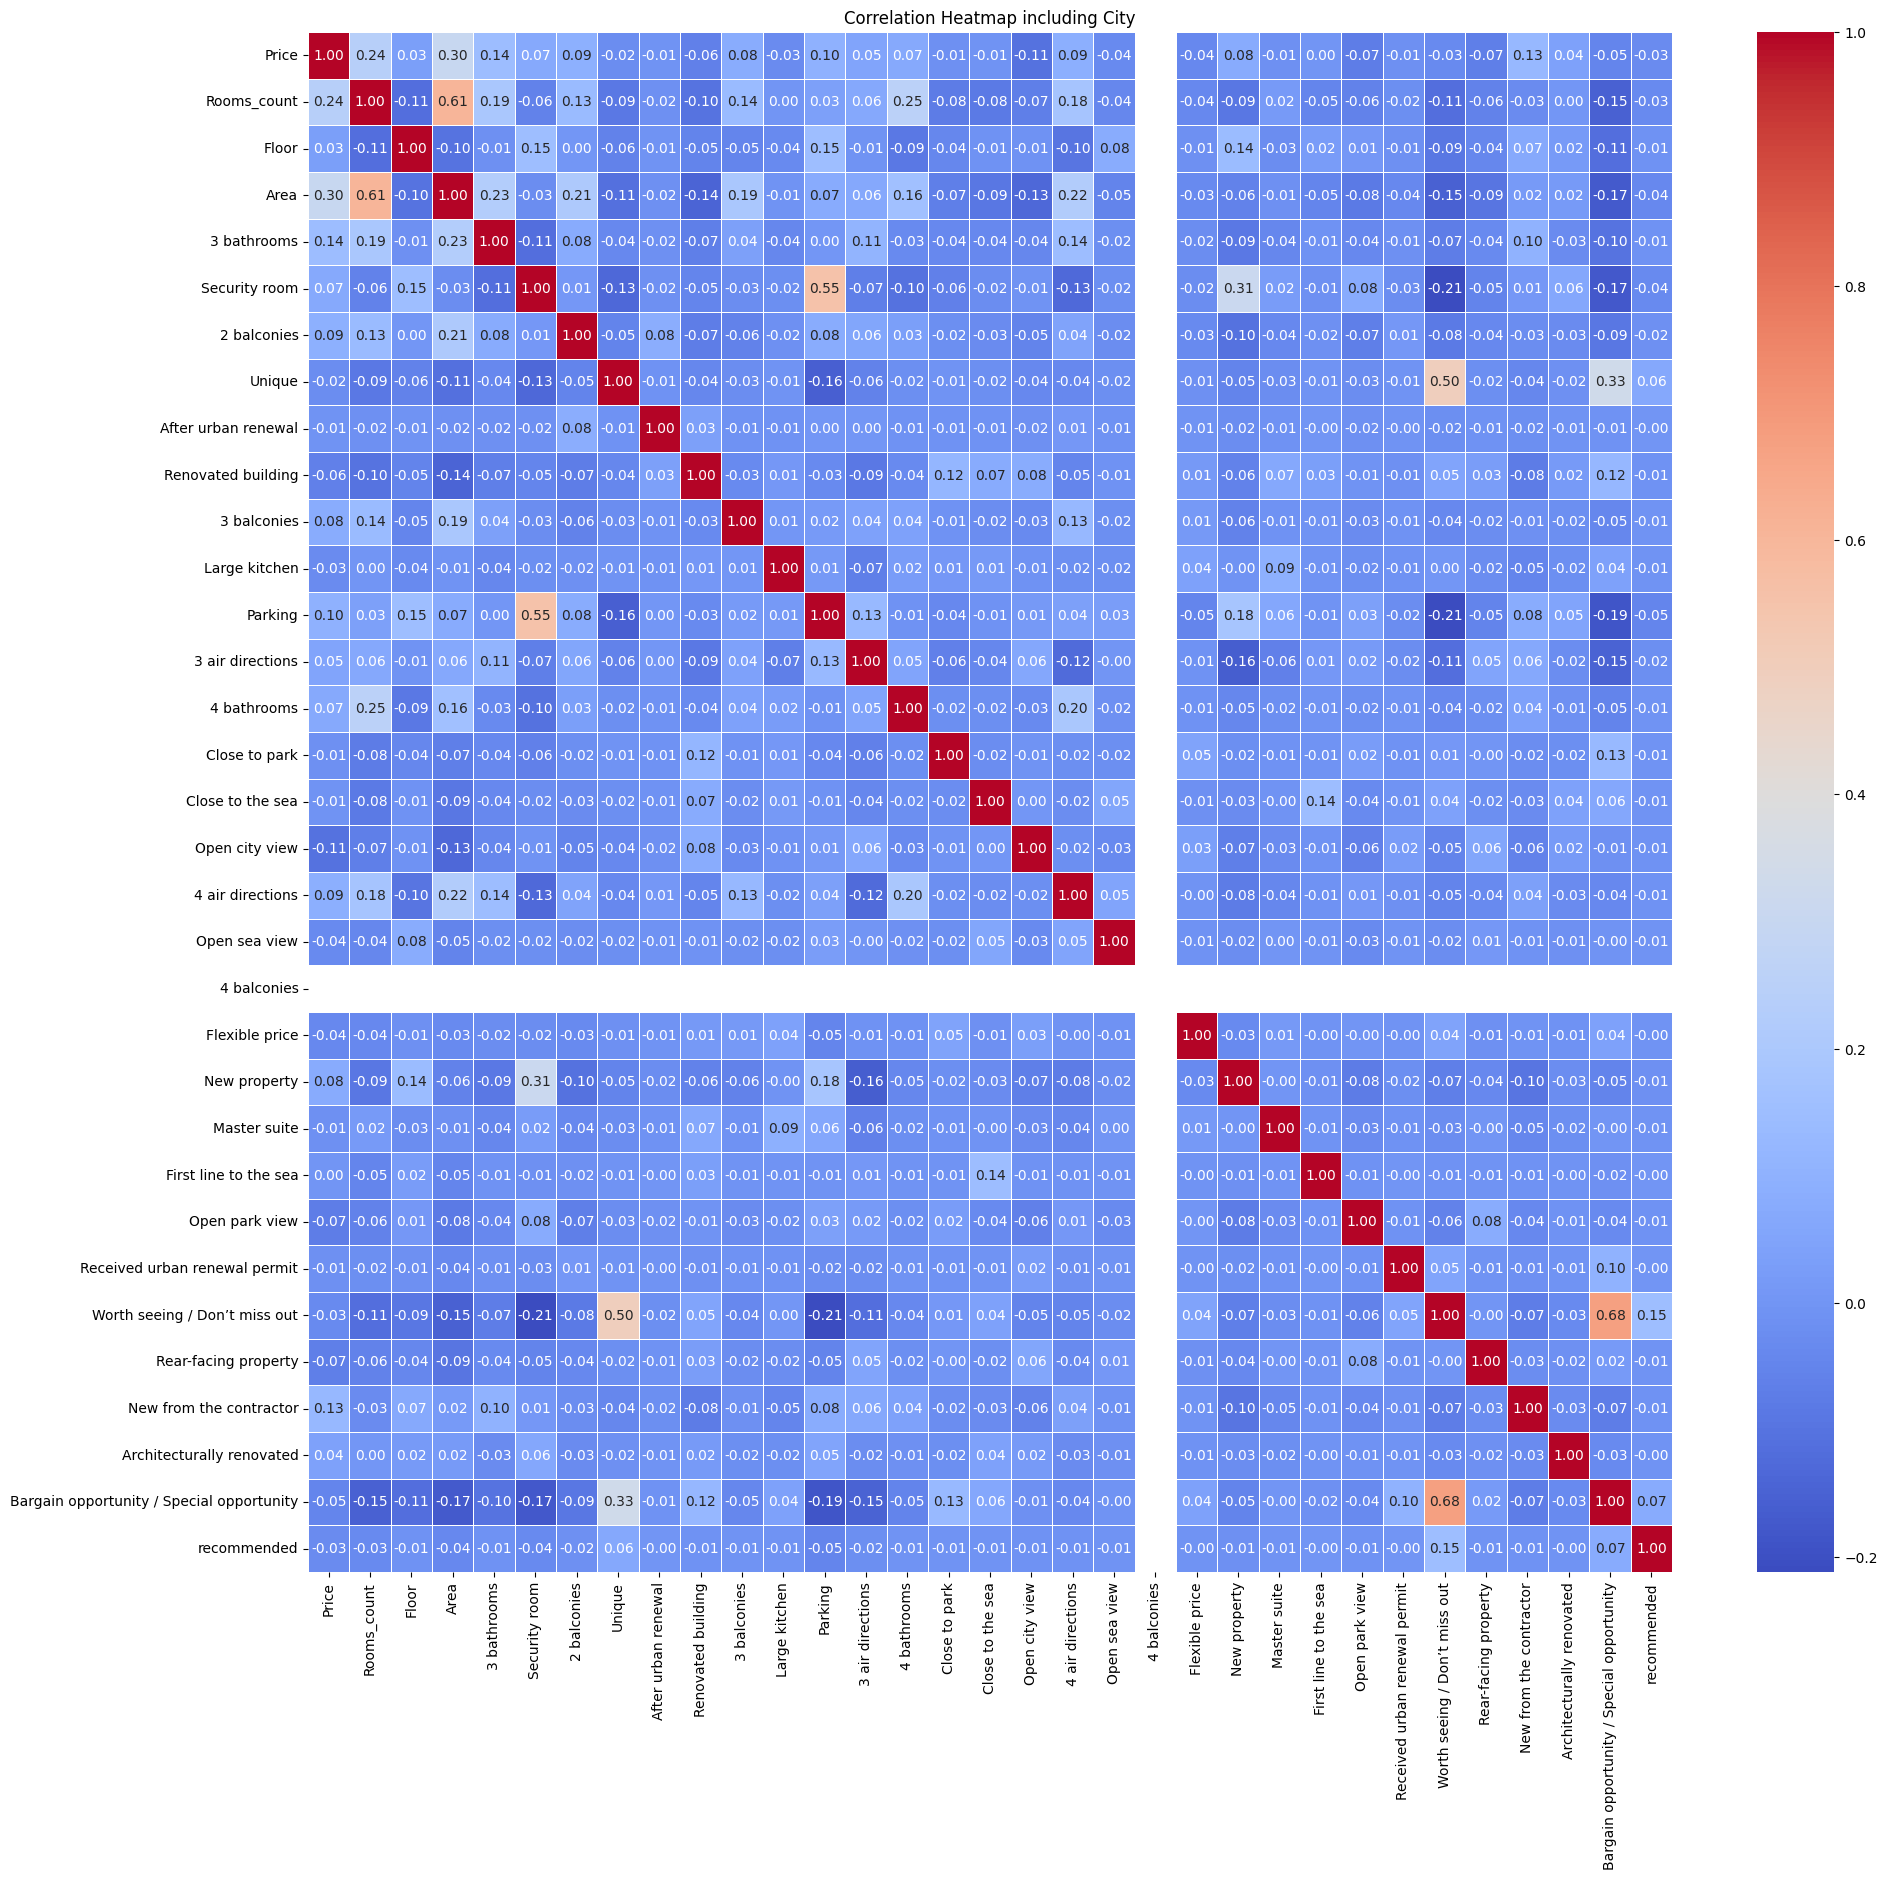

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# One-hot encode the 'City' column
df_encoded = pd.get_dummies(df, columns=['City'], prefix='City', drop_first=True)

# Keep only numeric columns (including the encoded cities)
numeric_df = df_encoded.select_dtypes(include=['number'])

# Calculate the correlation between 'Price' and all numeric columns
correlation_matrix = numeric_df.corr()

# Print only the correlation with 'Price'
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)
print("Correlation with Price:")
print(correlation_with_price)

# Create the heatmap
plt.figure(figsize=(22, 20))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display settings
plt.title('Correlation Heatmap including City')
plt.show()
